[[0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.1, 0.1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


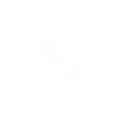

In [5]:
from canvas_env import decode
import torch
from PIL import Image
from IPython.display import display

#                                        size    opacity
# 0-9: stroke - (x0, y0, x1, y1, x2, y2, z0, z2, w0, w2)
# 10-12: color
# 13: erase or draw
# action = [
#     [0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.1, 0.1, 1, 1, 1, 1, 1, 1],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# ]

action = [
    [1.0, 1.0, 0.43, 0.99, 0.15, 1.0, 0.32, 0.15, 0.41, 0.3, 0.0, 0.0, 0.0, 0.46], 
    [0.81, 0.14, 1.0, 0.0, 0.22, 0.45, 1.0, 1.0, 0.59, 0.02, 0.13, 0.17, 0.21, 0.53], 
    [0.99, 0.36, 0.01, 0.96, 0.83, 0.0, 0.03, 0.61, 0.68, 0.97, 0.01, 0.0, 0.01, 0.42], 
    [0.01, 0.71, 0.21, 1.0, 0.3, 0.99, 0.31, 0.19, 1.0, 0.76, 0.0, 0.0, 0.0, 0.39], 
    [0.17, 0.73, 1.0, 0.0, 0.87, 0.27, 1.0, 1.0, 0.2, 0.1, 0.09, 0.1, 0.11, 0.67]
]

# round up action numbers to 2 decimal places
for i in range(len(action)):
    for j in range(len(action[i])):
        action[i][j] = round(action[i][j], 2)


print(str(action))

action = torch.tensor(action, dtype=torch.float32)

canvas = torch.zeros(1, 4, 128, 128)

canvas = decode(action, canvas)

display(Image.fromarray((canvas
[0].permute(1, 2, 0).detach().numpy() * 255).astype('uint8')))